# Visualization: Batch evaluation results of backoff configurations
#### Load the data and enrich with config information

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# use LaTeX fonts in the plot
plt.rc('font', family='serif')

# load data
df = pd.read_csv("results/BatchTestResults-takeMoreButCommon-2.csv",encoding = "ISO-8859-1", skipinitialspace=True)
df['Config File'] = df.index

# load details from corresponding config files
for i in df["Config File"]:
    with open('./configs/config_'+str(i)+'.json') as json_file:  
        data = json.load(json_file)
        df.at[i, 'backoff'] = data['Layers'][0]['Backoff']
        df.at[i, 'Condition'] = data['Layers'][0]['Condition']
        df.at[i, 'threshold'] = data['Layers'][0]['Threshold']
        df.at[i, 'threshold_float'] = data['Layers'][0]['ThresholdFloat']
        df.at[i, 'merger'] = data['Layers'][0]['Merger']
        df.at[i, 'splitter'] = data['Layers'][0]['Splitter']
        df.at[i, 'stepsize'] = data['Layers'][0]['Stepsize']
        df.at[i, 'Parallel Execution'] = data['Layers'][0]['ParallelExecutions']
               
        if df.at[i, 'Condition'] == "tooUnlikelyRecommendationsCondition":
            df.at[i, 'Condition'] = "tooUnlikelyRecommendations"
        
        if df.at[i, 'backoff'] == 'splitProperty':
            df.at[i, 'Parallel Execution'] = 2
            df.at[i, 'Description'] = "Split Property (" +  df.at[i, 'splitter'] + " "+ df.at[i, 'merger']+")"
        if df.at[i, 'backoff'] == 'deleteLowFrequency':
             df.at[i, 'Description'] ="Delete Low Frequency ("+df.at[i, 'stepsize']+")"
                
df['Parallel Execution'] = df['Parallel Execution'].astype(int)

df["f1"]=2*df["precisionAtL"]*df["recall"]/(df["precisionAtL"]+df["recall"])

#### Final plot of the performance

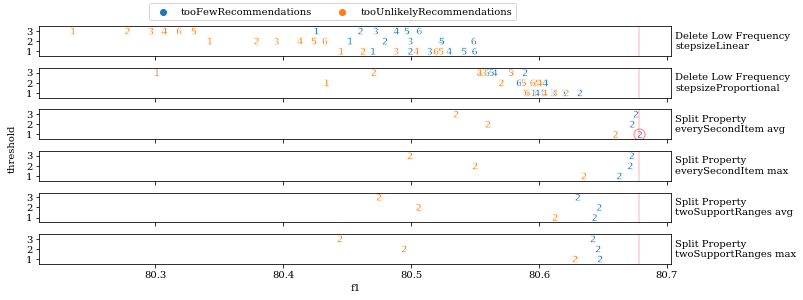

In [2]:
f, axes = plt.subplots(6, 1, figsize=(11, 4), sharex=True, sharey=True)
markers = {1: r"$\mathbf{1}$", 2:"$\mathbf{2}$", 3:"$\mathbf{3}$", 4:"$\mathbf{4}$", 5:"$\mathbf{5}$", 6:"$\mathbf{6}$"}

for ax, column in list(zip(axes.flat, sorted(set(df["Description"])))):
    sns.scatterplot(
        x="f1", 
        y="threshold", 
        hue="Condition",
        style="Parallel Execution",
        markers=markers,
        edgecolors='none',
        data=df[df["Description"]==column], 
        ax=ax,
        s = 50
    )
    ax.get_legend().remove()
#     ax.set_title(column, fontsize=10, rotation=90, loc="left", horizontalalignment='right', verticalalignment='center',)
    ax.set_aspect('auto')
    ax.yaxis.set_label_position("right")
    ax.set_ylabel(column.replace(" (","\n")[:-1], rotation=0,
                  horizontalalignment='left', verticalalignment="center")
    ax.axvline(x=80.6785,c="r",alpha=.2)

f.tight_layout()

f.text(-0.01, 0.54, 'threshold', va='center', rotation='vertical')

handles, labels = ax.get_legend_handles_labels()
#f.legend(handles, labels, loc='center left', bbox_to_anchor=(1.01, 0.46), borderaxespad=0.)
f.legend(handles[1:3], labels[1:3], loc='upper center', bbox_to_anchor=(0.42, 1.03), borderaxespad=0.,ncol=2)

plt.subplots_adjust(hspace=0.4)

axes.flat[2].plot((80.6785), (1.055), 'o', mec="r", mew=1,mfc="none",ms=11, alpha=.5)

axes.flat[2]

# plt.savefig('batch.pdf',bbox_inches='tight')
plt.show()

#### Different additional visualizations of the same data

<Figure size 1080x1800 with 0 Axes>

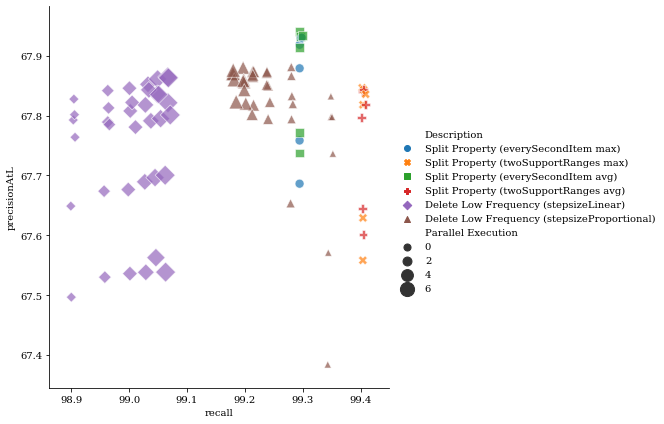

<Figure size 1080x1800 with 0 Axes>

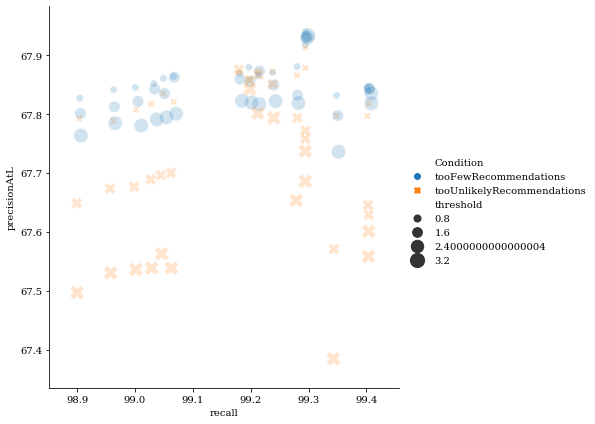

In [3]:
plt.figure(figsize=(15,25))
g = sns.relplot(x="recall", y="precisionAtL", hue="Description",style ="Description", size="Parallel Execution",
            sizes=(50, 200), alpha=.7,
            height=6, data=df)

# plt.savefig("backoff_comp.pdf", bbox_inches='tight')

plt.figure(figsize=(15,25))
g = sns.relplot(x="recall", y="precisionAtL", hue="Condition", style="Condition", size="threshold",
            sizes=(50, 200), alpha=.2,
            height=6, data=df)

# plt.savefig("condition_comp.pdf", bbox_inches='tight')  

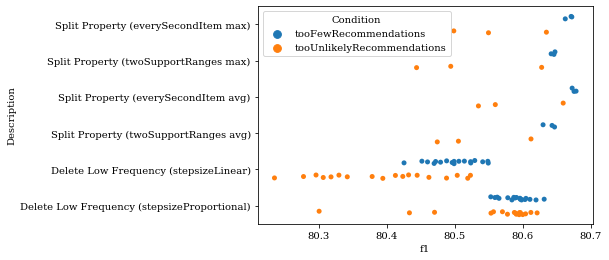

In [4]:
sns.stripplot(x="f1", y="Description", data=df, jitter=True, dodge=True, hue="Condition")

#### Drilling down into additional data details

In [5]:
df.columns
df[['backoff','Condition', 'threshold', 'threshold_float', 'Parallel Execution']].query("Condition=='tooUnlikelyRecommendations'")

,backoff,Condition,threshold,threshold_float,Parallel Execution
16,splitProperty,tooUnlikelyRecommendations,1.0,0.033333,2
17,splitProperty,tooUnlikelyRecommendations,1.0,0.033333,2
18,splitProperty,tooUnlikelyRecommendations,1.0,0.033333,2
19,splitProperty,tooUnlikelyRecommendations,1.0,0.033333,2
20,deleteLowFrequency,tooUnlikelyRecommendations,1.0,0.033333,1
21,deleteLowFrequency,tooUnlikelyRecommendations,1.0,0.033333,1
22,deleteLowFrequency,tooUnlikelyRecommendations,1.0,0.033333,2
23,deleteLowFrequency,tooUnlikelyRecommendations,1.0,0.033333,2
24,deleteLowFrequency,tooUnlikelyRecommendations,1.0,0.033333,3
25,deleteLowFrequency,tooUnlikelyRecommendations,1.0,0.033333,3


In [6]:
df[df['precisionAtL']==max(df['precisionAtL'])]

,Config File,subjects,duration,mean,meanOfHits,median,stddev,top1,top5,top10,...,backoff,Condition,threshold,threshold_float,merger,splitter,stepsize,Parallel Execution,Description,f1
2,2,40663,24.8525,3.9176,2.7069,1.0,27.1357,79.1776,93.3601,96.4316,...,splitProperty,tooFewRecommendations,1.0,0.0,avg,everySecondItem,,2,Split Property (everySecondItem avg),80.678406


In [7]:
df[df['Description']=='Split Property (twoSupportRanges max)']

,Config File,subjects,duration,mean,meanOfHits,median,stddev,top1,top5,top10,...,backoff,Condition,threshold,threshold_float,merger,splitter,stepsize,Parallel Execution,Description,f1
1,1,40663,24.9412,3.5964,2.9118,1.0,22.6400,79.0129,93.1830,96.3529,...,splitProperty,tooFewRecommendations,1.0,0.000000,max,twoSupportRanges,,2,Split Property (twoSupportRanges max),80.647379
17,17,40663,25.1936,3.5968,2.9122,1.0,22.6036,78.9612,93.1732,96.2915,...,splitProperty,tooUnlikelyRecommendations,1.0,0.033333,max,twoSupportRanges,,2,Split Property (twoSupportRanges max),80.627810
33,33,40663,25.0576,3.5886,2.9040,1.0,22.6015,79.0079,93.1855,96.3210,...,splitProperty,tooFewRecommendations,2.0,0.000000,max,twoSupportRanges,,2,Split Property (twoSupportRanges max),80.645903
49,49,40663,28.2981,3.6504,2.9659,1.0,22.6319,78.8038,92.7551,95.9054,...,splitProperty,tooUnlikelyRecommendations,2.0,0.066667,max,twoSupportRanges,,2,Split Property (twoSupportRanges max),80.494229
65,65,40663,25.1729,3.5933,2.9087,1.0,22.6081,78.9932,93.1928,96.3308,...,splitProperty,tooFewRecommendations,3.0,0.000000,max,twoSupportRanges,,2,Split Property (twoSupportRanges max),80.641761
81,81,40663,29.6406,3.6649,2.9804,1.0,22.6657,78.7448,92.6838,95.8586,...,splitProperty,tooUnlikelyRecommendations,3.0,0.100000,max,twoSupportRanges,,2,Split Property (twoSupportRanges max),80.443993


In [8]:
df[df['duration']<26].sort_values('precisionAtL', ascending=False).drop_duplicates(['Description'])

,Config File,subjects,duration,mean,meanOfHits,median,stddev,top1,top5,top10,...,backoff,Condition,threshold,threshold_float,merger,splitter,stepsize,Parallel Execution,Description,f1
2,2,40663,24.8525,3.9176,2.7069,1.0,27.1357,79.1776,93.3601,96.4316,...,splitProperty,tooFewRecommendations,1.0,0.0,avg,everySecondItem,,2,Split Property (everySecondItem avg),80.678406
64,64,40663,24.9193,3.9297,2.7190,1.0,27.1494,79.1383,93.3010,96.4046,...,splitProperty,tooFewRecommendations,3.0,0.0,max,everySecondItem,,2,Split Property (everySecondItem max),80.672158
7,7,40663,24.8553,3.8081,2.8055,1.0,25.4850,79.0547,93.2814,96.3702,...,deleteLowFrequency,tooFewRecommendations,1.0,0.0,,,stepsizeProportional,2,Delete Low Frequency (stepsizeProportional),80.631517
12,12,40663,25.8503,4.9539,2.7036,1.0,35.3375,79.0620,93.2150,96.2693,...,deleteLowFrequency,tooFewRecommendations,1.0,0.0,,,stepsizeLinear,5,Delete Low Frequency (stepsizeLinear),80.541176
1,1,40663,24.9412,3.5964,2.9118,1.0,22.6400,79.0129,93.1830,96.3529,...,splitProperty,tooFewRecommendations,1.0,0.0,max,twoSupportRanges,,2,Split Property (twoSupportRanges max),80.647379
35,35,40663,25.1123,3.5999,2.9153,1.0,22.6287,79.0055,93.2051,96.2988,...,splitProperty,tooFewRecommendations,2.0,0.0,avg,twoSupportRanges,,2,Split Property (twoSupportRanges avg),80.646756
